In [1]:

%pip install matplotlib scikit-learn --quiet
%pip install sklearn --quiet

import numpy as np #array
import pandas as pd #dataframe
import matplotlib.pyplot as plt #grafici
from sklearn.datasets import fetch_california_housing #sklearn libreria più utilizzata per il ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.metrics import mean_squared_error, r2_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAG

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 1. Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedianHouseValue')

In [3]:
# 2. Quick look at the data
print("First 5 rows:\n", X.head())
print("\nTarget (y):\n", y.head())
print("\nDataset shape:", X.shape)
print("\nFeature names:", housing.feature_names)
print("\nDescription:", X.describe())
print("\nDescription:", y.describe())

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (y):
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedianHouseValue, dtype: float64

Dataset shape: (20640, 8)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Description:              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870

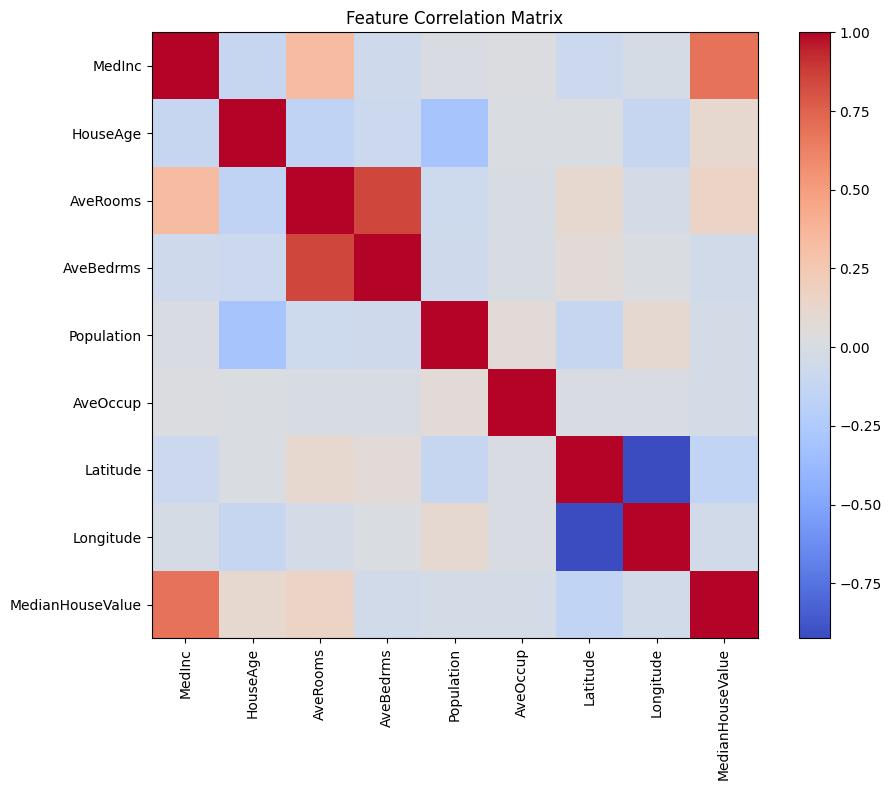

In [4]:
# 3. Correlation heatmap 
plt.figure(figsize=(10, 8))
correlation_matrix = X.join(y).corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Feature Correlation Matrix")
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.tight_layout()
plt.show()

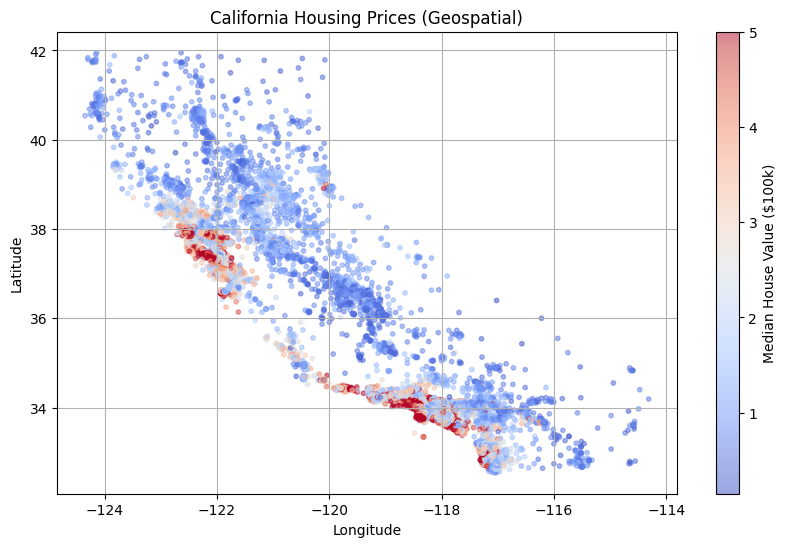

In [5]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    X["Longitude"], X["Latitude"],
    c=y, cmap="coolwarm", alpha=0.5, s=10
)
plt.colorbar(sc, label="Median House Value ($100k)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices (Geospatial)")
plt.grid(True)
plt.show()

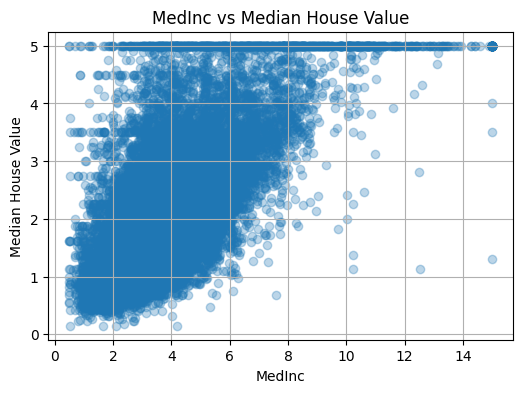

In [6]:
# 4. Scatter plot of most correlated feature
most_corr = correlation_matrix["MedianHouseValue"].drop("MedianHouseValue").abs().idxmax()
plt.figure(figsize=(6, 4))
plt.scatter(X[most_corr], y, alpha=0.3)
plt.xlabel(most_corr)
plt.ylabel("Median House Value")
plt.title(f"{most_corr} vs Median House Value")
plt.grid(True)
plt.show()

In [7]:
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# 6. Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# 7. Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.5559
R² Score: 0.5758


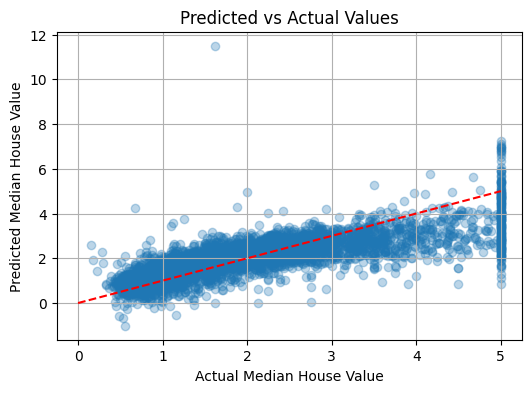

In [11]:
# 8. Plot predictions vs actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()